In [1]:
from utils import iteration_logging
from cycles.graph_cycle_iterator import GraphCycleIterator
from graph_edge_iterator import GraphEdgeIterator
from tqdm.auto import tqdm
from matplotlib import pyplot as plt


In [2]:
BUFFER_COUNT = 2
PRUNE_INTERVAL = 1_000
END_DATE = "2019-08-12"

In [3]:
def edge_generator():
    return GraphEdgeIterator(end_date=END_DATE, buffer_count=BUFFER_COUNT)


TOTAL_EDGES = len(list(edge_generator()))

In [4]:
def wrapped_edge_generator(log_stream):
    return tqdm(
        iteration_logging(
            edge_generator(),
            log_stream=log_stream
        ),
        total=TOTAL_EDGES
    )


def cycle_generator(omega, log_stream_edges=None, combine_seeds=True):
    return GraphCycleIterator(
        wrapped_edge_generator(log_stream_edges),
        omega,
        combine_seeds=combine_seeds,
    )

Processing cycles:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1682944 [00:00<?, ?it/s]

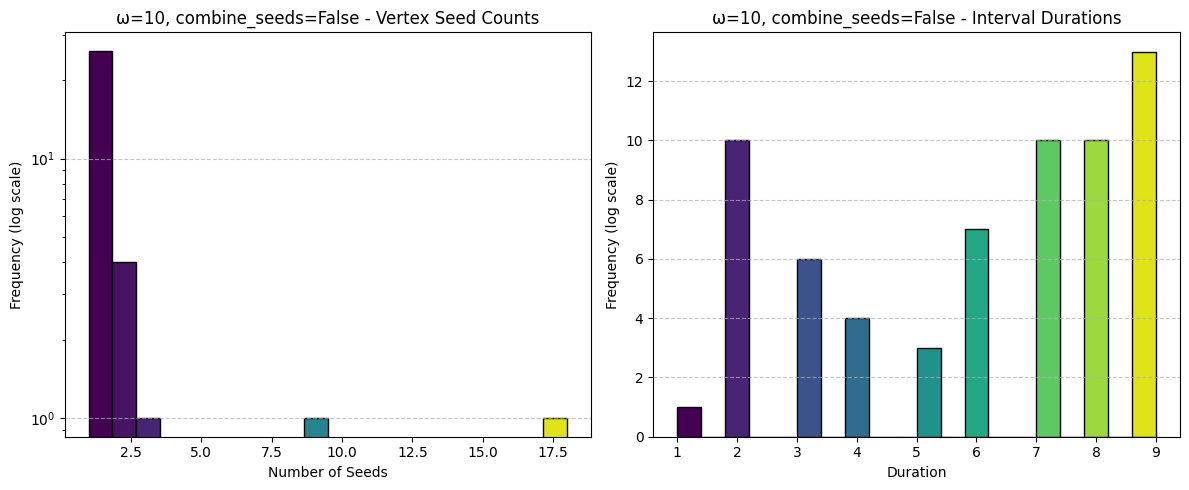

  0%|          | 0/1682944 [00:00<?, ?it/s]

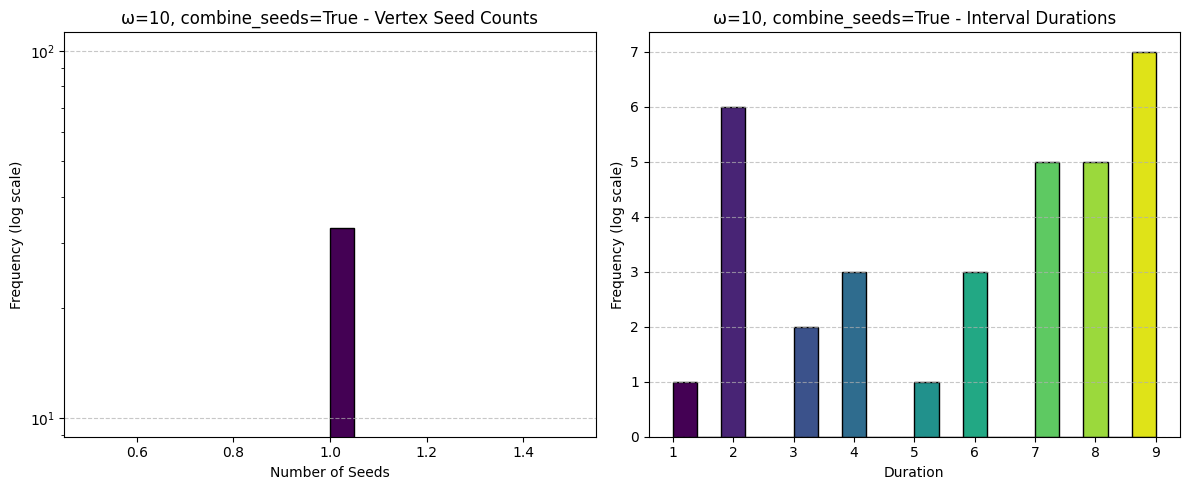

  0%|          | 0/1682944 [00:00<?, ?it/s]

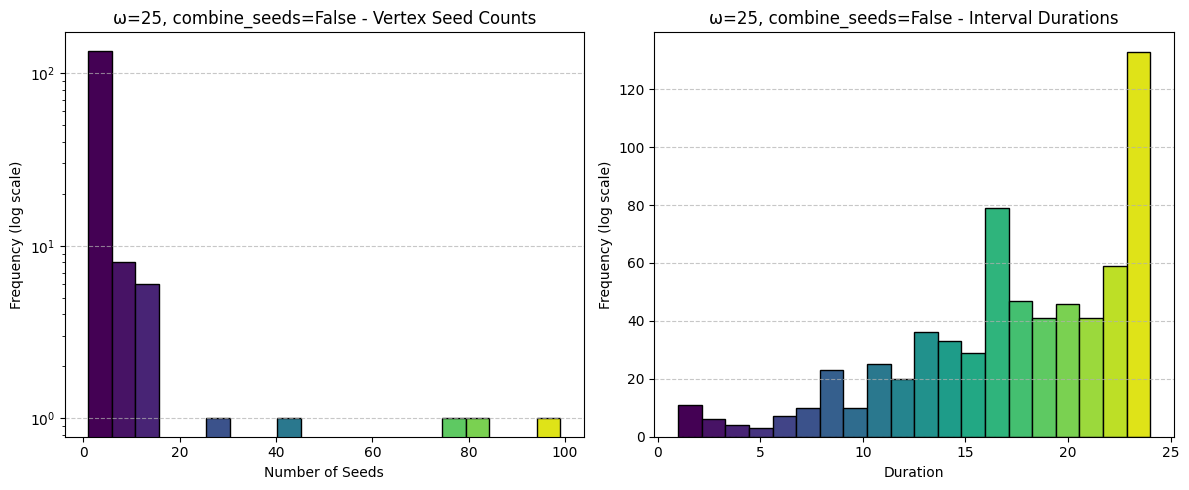

  0%|          | 0/1682944 [00:00<?, ?it/s]

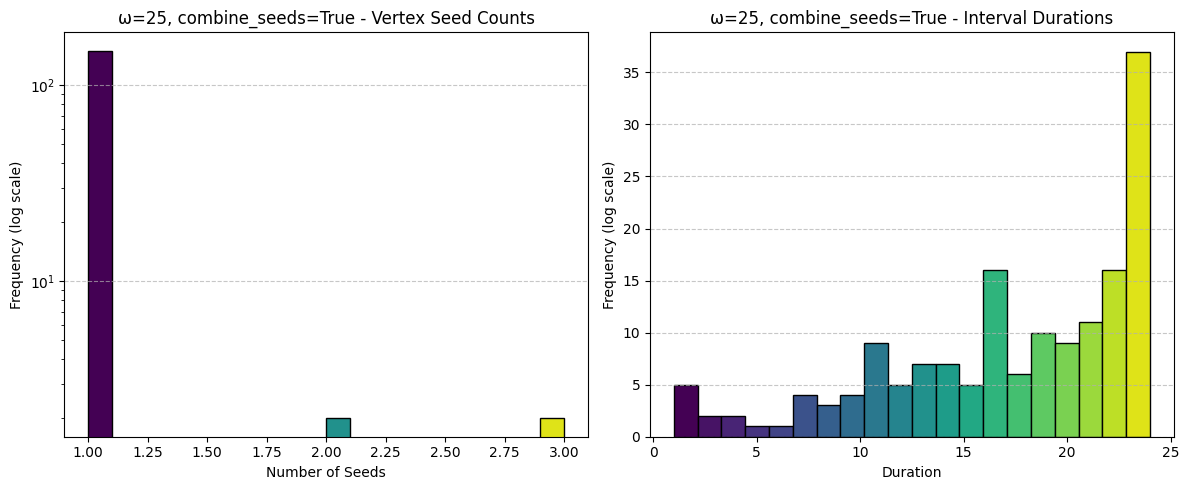

  0%|          | 0/1682944 [00:00<?, ?it/s]

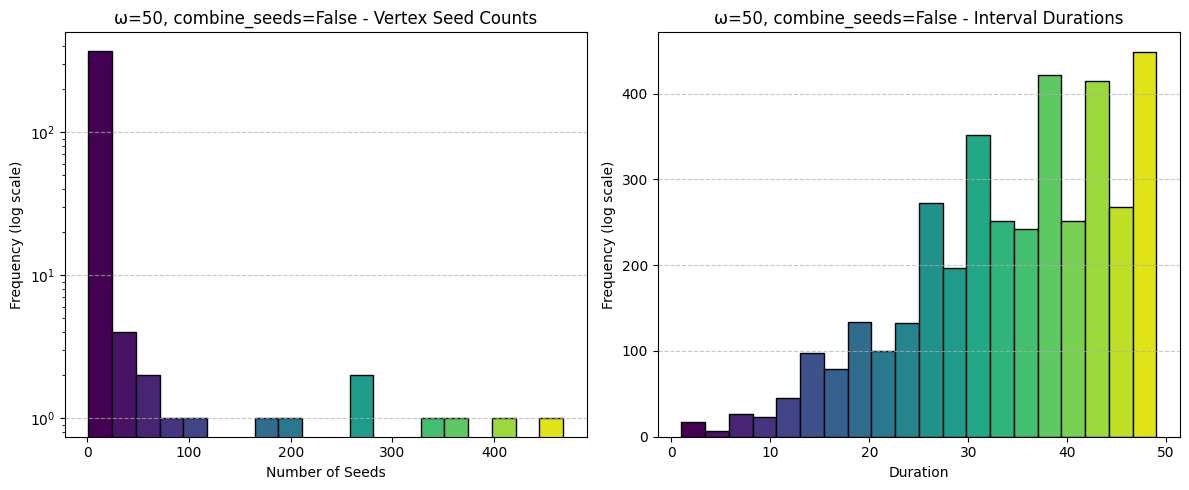

  0%|          | 0/1682944 [00:00<?, ?it/s]

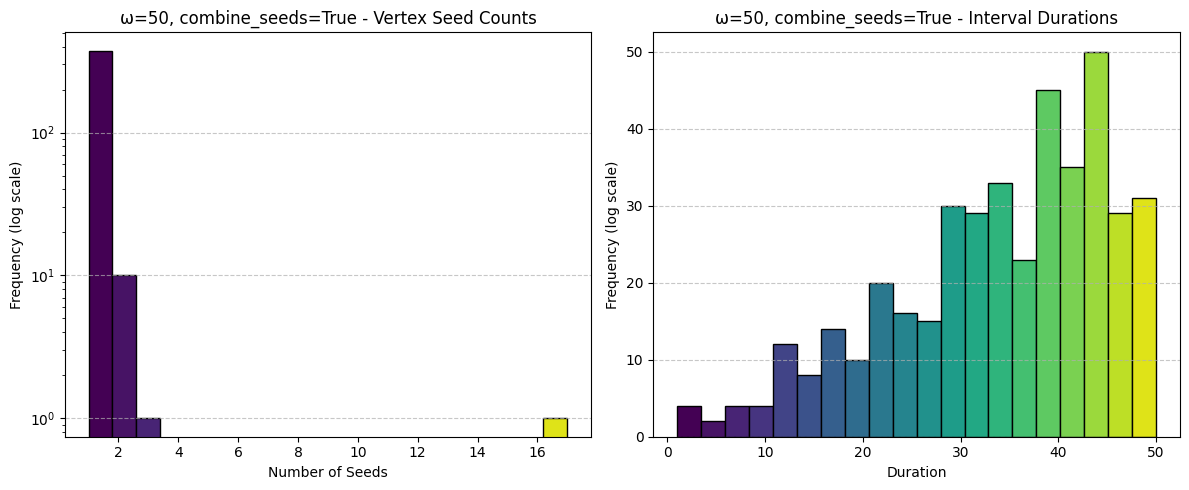

  0%|          | 0/1682944 [00:00<?, ?it/s]

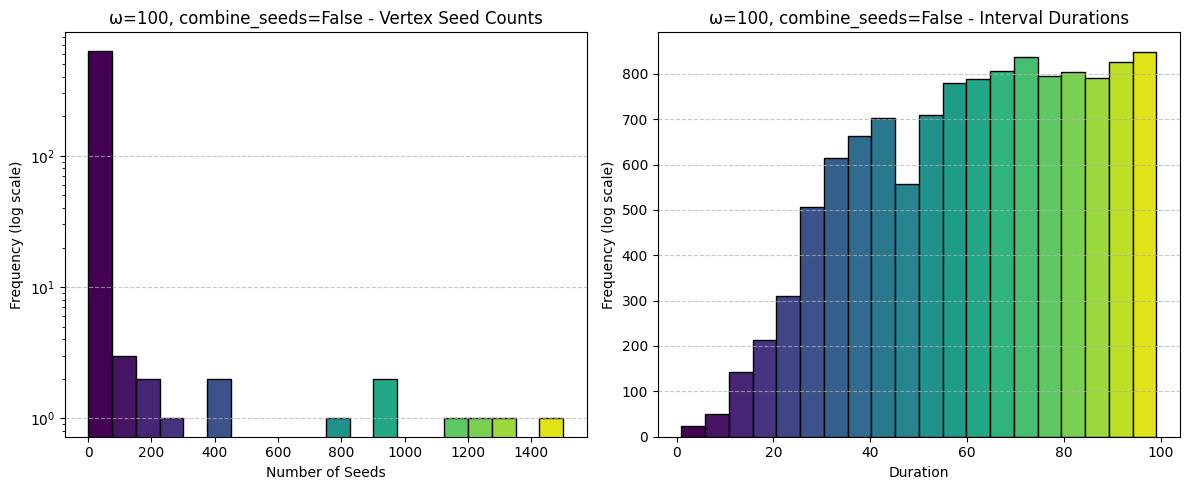

  0%|          | 0/1682944 [00:00<?, ?it/s]

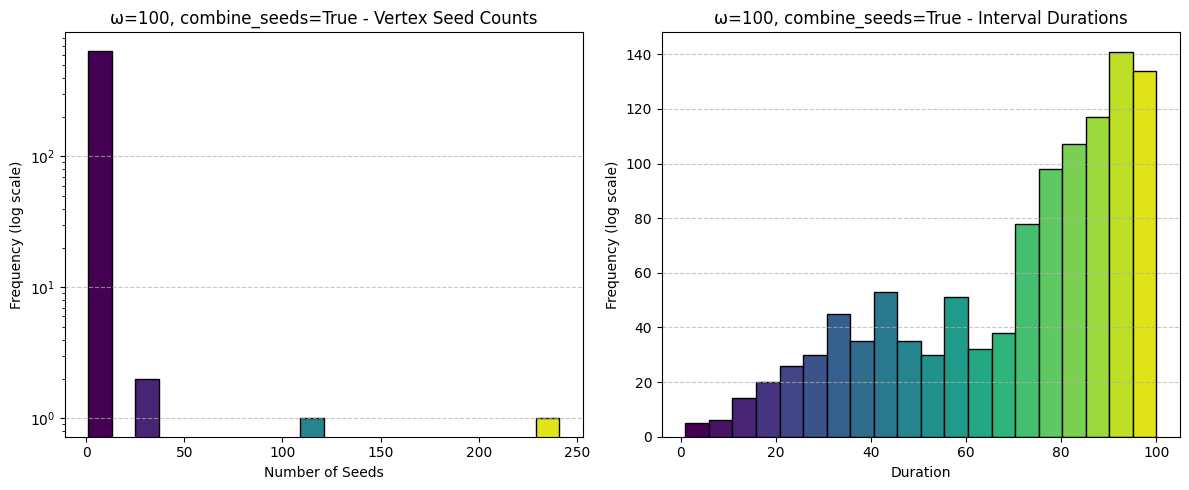

In [5]:
def get_vertex_seed_counts(iterator):
    """Returns a list of counts of root _seed_intervals from the iterator."""
    return [len(interval_tree) for interval_tree in iterator._seed_intervals.values() if interval_tree]

def get_seed_duration_counts(iterator):
    """Returns a list of interval durations from the iterator."""
    return [
        interval.length()
        for interval_tree in iterator._seed_intervals.values() if interval_tree
        for interval in interval_tree
    ]

# Iterate over different omega values and whether to combine _seed_intervals
for omega in tqdm([10, 25, 50, 100], desc="Processing cycles"):
    for combine_seeds in [False, True]:
        iterator = cycle_generator(omega, combine_seeds=combine_seeds)
        list(iterator)  # Exhaust the iterator

        title_prefix = f"ω={omega}, combine_seeds={combine_seeds}"

        # Prepare data
        vertex_counts = get_vertex_seed_counts(iterator)
        duration_counts = get_seed_duration_counts(iterator)

        # Create figure and subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Viridis colormap
        cmap = plt.cm.viridis
        norm_vertex = plt.Normalize(vmin=min(vertex_counts), vmax=max(vertex_counts))
        norm_duration = plt.Normalize(vmin=min(duration_counts), vmax=max(duration_counts))

        # Vertex seed count histogram
        counts, bins, patches = axes[0].hist(vertex_counts, bins=20, edgecolor="black", log=True)
        for patch, value in zip(patches, bins):
            patch.set_facecolor(cmap(norm_vertex(value)))
        axes[0].set_title(f"{title_prefix} - Vertex Seed Counts")
        axes[0].set_xlabel("Number of Seeds")
        axes[0].set_ylabel("Frequency (log scale)")
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)

        # Interval duration histogram
        counts, bins, patches = axes[1].hist(duration_counts, bins=20, edgecolor="black")
        for patch, value in zip(patches, bins):
            patch.set_facecolor(cmap(norm_duration(value)))
        axes[1].set_title(f"{title_prefix} - Interval Durations")
        axes[1].set_xlabel("Duration")
        axes[1].set_ylabel("Frequency (log scale)")
        axes[1].grid(axis="y", linestyle="--", alpha=0.7)

        # Adjust layout and show plots
        plt.tight_layout()
        plt.show()

In [9]:
len(next(iter(next(iter(iterator._seed_intervals.values())))))


3